### Gradient Descent and Linear Regression
We will use gradient descent to identify the parameter $\theta_0$ that minimizes the Mean Squared Error of predictions using the model $y = \theta_0  x$.  We will use a dataset containing information from a credit card company on customers.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
credit = pd.read_csv('data/Credit.csv', index_col=0)

In [5]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<Axes: >

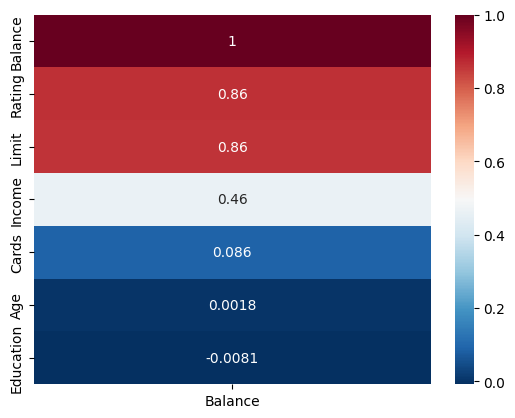

In [ ]:
numeric_columns = credit.select_dtypes(include=[np.number]).columns

sns.heatmap(credit[numeric_columns].corr()[['Balance']].sort_values(by = 'Balance', ascending = False), annot = True, cmap = 'RdBu_r')

In [9]:
X = credit[['Rating']]
y = credit['Balance']

<Axes: xlabel='Rating', ylabel='Balance'>

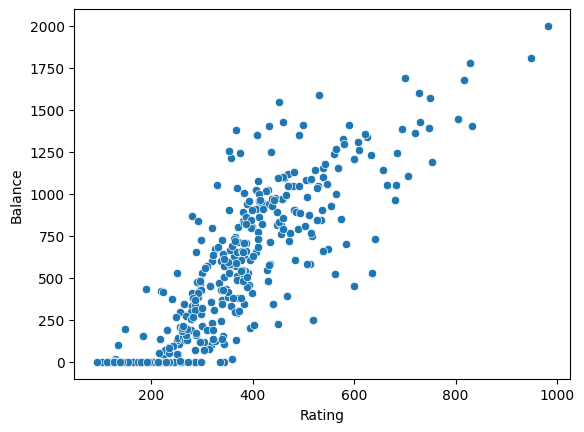

In [10]:
sns.scatterplot(data = credit, x = 'Rating', y = 'Balance')

#### Basic Model



In [11]:
def mse(theta):
    return_value = np.mean((y - theta * credit['Rating']) ** 2)
    return return_value
    
mse(10)

np.float64(10550372.83)


#### Considering Many $\theta$'s

In [12]:
thetas = np.linspace(-10, 13, 50)

In [13]:
mses = []
for theta in thetas:
    mses.append(mse(theta))

mses[-5:]

[np.float64(13551514.585476885),
 np.float64(14918512.776001668),
 np.float64(16351547.666930446),
 np.float64(17850619.258263227),
 np.float64(19415727.55)]

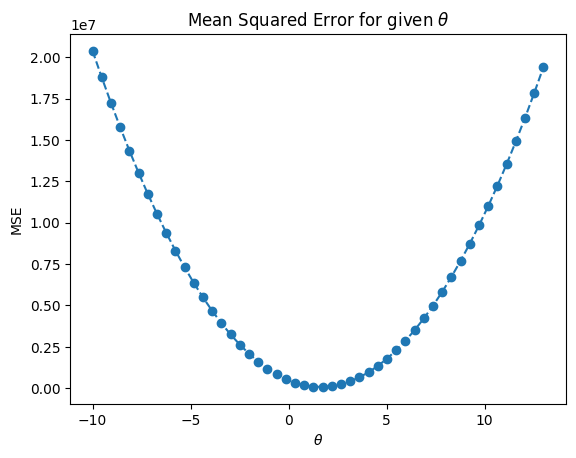

In [14]:
plt.plot(thetas, mses, '--o')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE');
plt.title(r'Mean Squared Error for given $\theta$');

#### Finding the $\theta$ that minimizes MSE


In [15]:
def df(x):
    return (mse(x + 0.001) - mse(x))/0.001

In [16]:
xs = [10]
for i in range(200):
    x_next = xs[-1] - 0.1 * df(xs[-1])    
    xs.append(x_next)
    
theta_big_step = xs[-1]
xs[-5:]

[np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2),
 np.float64(-225156150858558.2)]


#### A smaller step size

In [18]:
xs = [10]
for i in range(1000):
    x_next = xs[-1] - 0.000001 * df(xs[-1])    
    xs.append(x_next)
    
theta_small_step = xs[-1]   

xs[-5:]

[np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689),
 np.float64(1.6400427248908689)]

#### Checking against `sklearn`

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False).fit(X, y)
error = float(abs(lr.coef_[0] - xs[-1]))

print(error)

0.0004999999999419913
